# Asymptotic Eigenvalues

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
# Normal Distribution
def G(n,sigma2,na):
    return (2*np.pi*sigma2)**-.5*np.exp(-(n-na)**2/2/sigma2)

#Asymptotic Eigenvalues
def eigs(i,L,b):
    return  1/(1+np.exp(np.pi**2/(2*(np.log(L)+b))*(-L+2*i+1)))

In [3]:
# Parameters
L=100000  #system size
alpha=2.0 #
b = np.log(8)+0.5772156649

In [4]:
#Calculate the asymptotic eigenvalues
EigenvaluesTH=np.zeros(L)
for i in range(L):
    EigenvaluesTH[i]=eigs(i,L,b)

/Users/hatembarghathi/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in exp


In [5]:
# load Eigenvalues
data = np.loadtxt('PBCL200kN100kl100kalpha2.0eigvals.dat')
l=data[:,0] 
EigenvaluesED=data[:,1]

# load raw data and calculate the average and the variance of the number of particles
data = np.loadtxt('PBCL200kN100kl100kalpha2.0Pn.dat')
n = data[:,0]
Pn = data[:,1]
avgn=np.sum(Pn*n)
sigma2=np.sum(Pn*n**2)-avgn**2


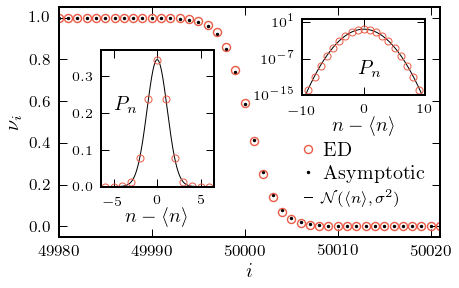

In [6]:
plt.style.reload_library()
with plt.style.context('aps.mplstyle'):
    fig = plt.figure()

    #Principal Plot
    ax= fig.add_subplot(111)
    ax.set_xlabel(r'$i$')
    ax.set_ylabel(r'$\nu_i$')
    ax.set_xlim(50000-20,50001+20)
    ax.plot(l,EigenvaluesED, color='#e95c47',marker='o',    mfc='None',ms=4.0, mew=0.7,linestyle='None', label=r'$\rm{ED}$',zorder=2)
    ax.plot(l,EigenvaluesTH, color='#000000',marker='o',    mfc='#000000',ms=1.0, mew=0.7,linestyle='None', label=r'$\rm{Asymptotic}$',zorder=1)
    ax.legend(loc=(0.62,0.2),frameon=False,handlelength=.5, numpoints=1,ncol=1)

    #Inset Plot: Right
    left1, bottom1, width1, height1 = [0.62, 0.59, 0.25, 0.25]
    ax1 = fig.add_axes([left1,bottom1,width1,height1])
    ax1.set_xlabel(r'$n-\langle n \rangle$', labelpad=0.1)    
    ax1.set_xlim(-10,+10)
    ax1.set_ylim(1e-15,5e+1)
    ax1.set_yscale('log', linthreshx = 1e-6)    
    ax1.tick_params(labelsize=7)
    ax1.text(-1,1e-11,r'$P_n$')
   
    nTH = np.arange(avgn-20, avgn+20.0, 0.01)
    
    ax1.plot(nTH-avgn, G(nTH,sigma2,avgn) , color='#000000',linewidth = 0.5,linestyle='-', label=r'$\mathcal{N}(\langle n \rangle,\sigma^2)$')
    ax1.plot(n-avgn, Pn ,marker='o', color='#e95c47',ms=3.5,   mfc='None', mew=0.5,linestyle='None')
    ax1.legend(loc=(-.04,-1.55),frameon=False, numpoints=1,handlelength=.5,fontsize=8)

    #Inset Plot: Left 
    left2, bottom2, width2, height2 = [0.21, 0.29, 0.23, 0.45]
    ax2 = fig.add_axes([left2,bottom2,width2,height2])
    ax2.set_xlabel(r'$n-\langle n \rangle$', labelpad=0.1)    
    ax2.set_xlim(-6.5,+6.5)
    ax2.set_ylim(0,0.37)
    ax2.tick_params(labelsize=7)
    ax2.text(-5,0.2,r'$P_n$')

    ax2.plot(nTH-avgn, G(nTH,sigma2,avgn) , color='#000000',linewidth = 0.5,linestyle='-')
    ax2.plot(n-avgn, Pn ,marker='o', color='#e95c47',ms=3.5,   mfc='None', mew=0.5,linestyle='None')

    # Save the figure
    plt.savefig('AsymptoticEigenvalues.pdf')
    plt.savefig('AsymptoticEigenvalues.png')
    plt.show()